# Applying Euclidean distance only to High level features

In [192]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import pyplot as plt 
import math
from ipynb.fs.full.Utils import createKDeplot
import numpy as np
from sklearn.preprocessing import StandardScaler

In [193]:
from scipy import stats

def applyLogTransformation(df, features, suffix):
    newFeatures = []
    for feature in features:
#         df[feature + '_log'] = np.sqrt(df[feature])
    
        df[feature + suffix] = stats.boxcox(df[feature])[0]
        newFeatures.append(feature + suffix)
        print('skewnees before:', df[feature].skew(), ' after: ', df[feature + suffix].skew())
        
    createKDeplot(df,newFeatures)

In [194]:
df = pd.read_csv('./data/05-RawData.csv')
encodedFeaturesNames = pd.read_csv('./data/05-encodedFeatureNames.csv')
encodedFeaturesNames = encodedFeaturesNames['0'].values.tolist()

In [195]:
# Separating encodedFeatures from continous features
encodedFeatures = df[encodedFeaturesNames]
featuresToScale = df.drop(encodedFeaturesNames, axis=1)


In [197]:
ids = featuresToScale.id

In [198]:
featuresToScale = featuresToScale.iloc[:, 2:]

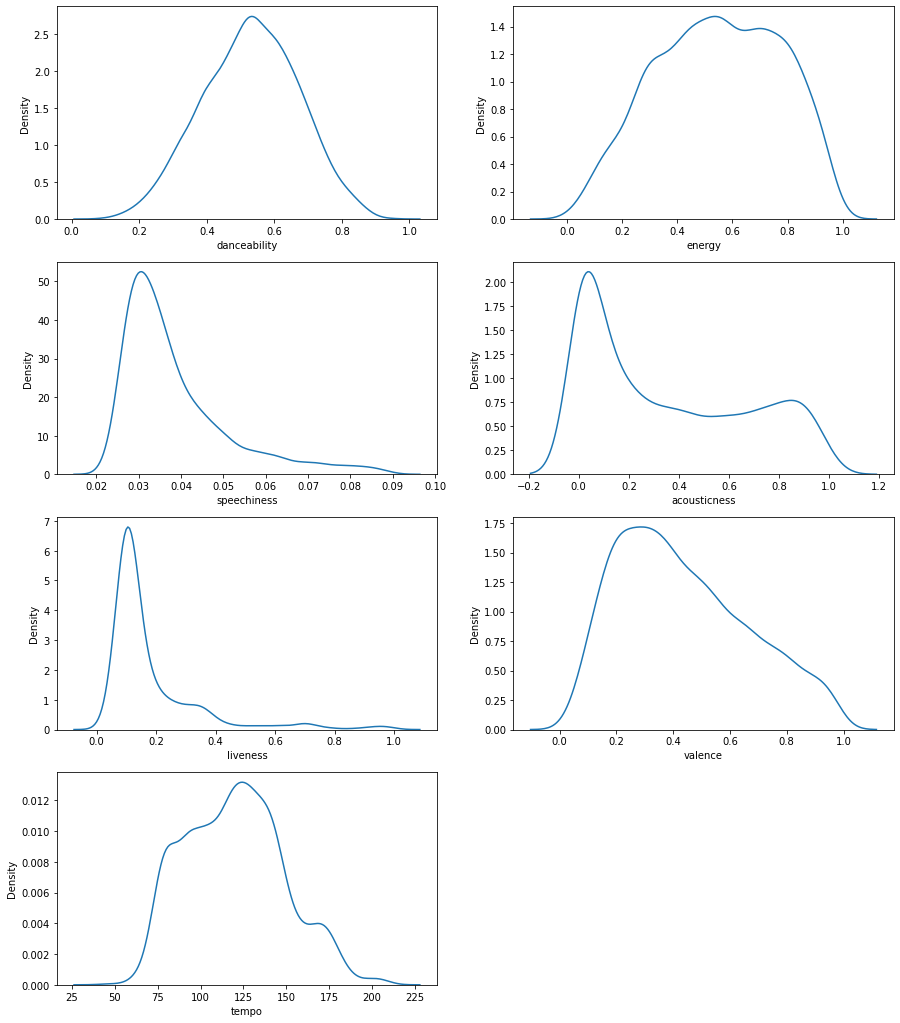

In [199]:
createKDeplot(featuresToScale,['danceability', 'energy', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo'])

## Managing Skewed variables

In [200]:
## Box Cox requires values different than 0 so no need to add a constant to fix it
featuresToScale[featuresToScale.valence == 0]

,danceability,energy,speechiness,acousticness,liveness,valence,tempo,year,0,1,...,1276,1278,1281,1286,1287,1288,1290,1292,1294,1295


skewnees before: 1.6265382111386124  after:  0.1255128804635066
skewnees before: 0.5075825883514323  after:  -0.31918009428475286
skewnees before: 2.672849631288445  after:  -0.01931234528357721
skewnees before: 0.48565159581018225  after:  -0.06584258014357276


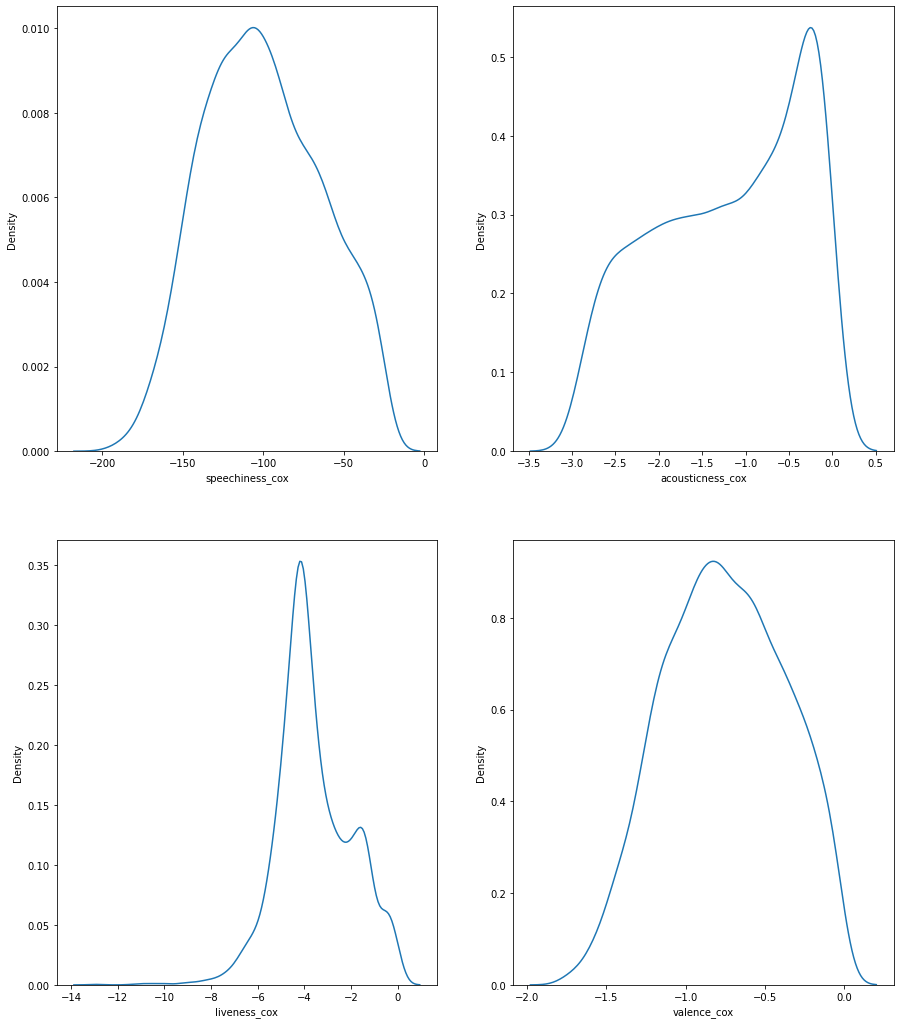

In [201]:
applyLogTransformation(featuresToScale, ['speechiness', 'acousticness', 'liveness', 'valence'], '_cox')

## Defining dataset

In [202]:
dfTransformed = featuresToScale[['speechiness_cox' ,'danceability', 'energy', 'acousticness_cox', 'liveness_cox', 'valence_cox', 'tempo']]

## Centering variables with different means

In [203]:
X = dfTransformed - dfTransformed.mean()
X.describe().round(2)

,speechiness_cox,danceability,energy,acousticness_cox,liveness_cox,valence_cox,tempo
count,3189.00,3189.00,3189.00,3189.00,3189.00,3189.00,3189.00
mean,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00
std,36.23,0.14,0.22,0.85,1.59,0.38,28.69
min,-95.91,-0.44,-0.55,-1.76,-9.33,-1.00,-76.61
25%,-27.59,-0.10,-0.17,-0.72,-0.94,-0.28,-23.26
50%,-2.36,0.00,0.00,0.11,-0.32,-0.01,0.08
75%,27.32,0.10,0.18,0.79,1.07,0.29,19.64
max,75.56,0.42,0.44,1.20,3.60,0.73,90.94


## Scaling variables with different variance

In [204]:
X = dfTransformed / dfTransformed.std()
X.describe().round(2)

,speechiness_cox,danceability,energy,acousticness_cox,liveness_cox,valence_cox,tempo
count,3189.00,3189.00,3189.00,3189.00,3189.00,3189.00,3189.00
mean,-2.76,3.73,2.44,-1.41,-2.27,-2.00,4.18
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-5.41,0.64,0.01,-3.48,-8.15,-4.65,1.51
25%,-3.52,3.03,1.66,-2.25,-2.87,-2.74,3.37
50%,-2.82,3.76,2.46,-1.29,-2.47,-2.01,4.18
75%,-2.01,4.44,3.25,-0.48,-1.60,-1.23,4.86
max,-0.67,6.66,4.41,-0.00,-0.01,-0.06,7.35


## Combining Centering and Scaling

In [177]:
cols = dfTransformed.columns
scaler = StandardScaler()
scaler.fit(dfTransformed)
data_normalized = scaler.transform(dfTransformed)
print('mean: ', data_normalized.mean(axis=0).round(2))
print('std: ', data_normalized.std(axis=0).round(2))

pd.DataFrame(data_normalized, columns=cols)

mean:  [-0.  0.  0. -0.  0. -0.  0.]
std:  [1. 1. 1. 1. 1. 1. 1.]


,speechiness_cox,danceability,energy,acousticness_cox,liveness_cox,valence_cox,tempo
0,0.747202,-0.253839,0.930385,-1.726938,0.381471,0.744627,0.469546
1,-0.179867,0.365461,0.876821,-1.851441,-2.946618,1.036307,0.469790
2,-1.192145,0.590661,0.925921,-1.224244,-0.937610,0.939236,-0.950043
3,0.393090,-1.485402,1.158030,-1.764670,-0.003912,0.787172,-0.061819
4,-0.140787,-0.239764,-0.091785,-0.067796,0.089440,-0.570924,1.257354
...,...,...,...,...,...,...,...
3184,1.059494,0.428799,0.966094,-0.926116,-0.469583,0.325653,1.745346
3185,-0.947204,0.062848,-0.176594,1.056589,0.475711,-0.890443,-0.645450
3186,-0.140787,0.801786,-1.038074,1.025850,-0.612842,-0.203722,-2.087423
3187,-1.066422,0.520286,-0.810429,0.823835,0.023521,-1.572435,0.770932


In [165]:
data_normalized

array([[ 0.7472016 , -0.25383905,  0.93038488, ...,  0.38147113,
         0.74462667,  0.46954594],
       [-0.17986708,  0.365461  ,  0.87682138, ..., -2.94661815,
         1.0363073 ,  0.46979001],
       [-1.19214514,  0.59066102,  0.92592125, ..., -0.9376098 ,
         0.93923635, -0.95004338],
       ...,
       [-0.14078671,  0.80178603, -1.03807365, ..., -0.61284163,
        -0.20372241, -2.08742329],
       [-1.06642229,  0.52028601, -0.81042879, ...,  0.02352114,
        -1.57243505,  0.77093192],
       [ 1.38959018, -0.07086403,  0.81879426, ...,  1.26130833,
         0.99642911,  1.88488155]])

In [164]:
type data_normalized

SyntaxError: invalid syntax (<ipython-input-164-e1e883513a12>, line 1)

In [159]:
data_normalized

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

## Key k-means assumptions

**Key steps**
- Symmetric distribution of variables (not skewed)
- Variables with same average values: This is key to ensure that each metric gets an equeal weight in the knn calculation.
- Variables with same variance: It helps the algorithm to converge and ensures equal importance, it is assigned to each variable
- Equal mean and variance

## Centering and scaling variables

K-means works well on variables with the same mean

#### Variables on the same scale

In [ ]:
skipScalingFeatures.head(1)

In [ ]:
featuresToScale = df.drop(encodedFeaturesNames.tolist(), axis=1)

In [ ]:
featuresToScale.head(1)

In [ ]:
featuresToScale.columns.tolist()

##### Scaling variables with different variance

In [ ]:
std_scale = StandardScaler().fit(featuresToScale_centered)
df_normalized = std_scale.transform(featuresToScale_centered)

In [ ]:
centeredScaledDF = pd.DataFrame(df_std)

In [ ]:
centeredScaledDF.describe()

In [ ]:
print('mean: ', df_normalized.mean(axis=0).round(2))
print('std: ', df_normalized.std(axis=0).round(2))

In [ ]:
df = pd.concat([centeredScaledDF, skipScalingFeatures], axis=1)

In [ ]:
df.describe()

In [ ]:
os.makedirs('./data', exist_ok=True)  
df.to_csv('./data/06-01-DataPrepared.csv')

In [ ]:
df